In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Pacejka Magic Formula

In [2]:
def fit(data, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13):
    FZ = data[0] / 1000 * -1
    SR = data[1]

    C = b0
    D = FZ * (b1 * FZ + b2)
    
    BCD = (b3 * FZ**2 + b4 * FZ) * np.exp(-1 * b5 * FZ)
    B = BCD / (C * D)
    H = b9 * FZ + b10

    E = (b6 * FZ**2 + b7 * FZ + b8) * (1 - b13 * np.sign(SR + H))

    V = b11 * FZ + b12
    Bx1 = B * (SR + H)

    return (D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V)

### Desired Parameters for Filtering

In [3]:
tires = {"hoosier_r25b_16x7-5_10x8":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1

### Import and Filter Tire Data

In [4]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/braking_{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity)]
        # print(tire["long"])
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure)]
        # print(tire["lat"])

    except:
        print("Error getting lateral data for {0}".format(name))

### Define Coefficients

In [6]:
df = tires["hoosier_r25b_16x7-5_10x8"]["long"]
x_lst = [x for x in df["load"].tolist()]
y_lst = [x * 100 for x in df["SL"].tolist()]
z_lst = df["FX"].tolist()

optimal = [0.771, 192.991,  3001.746, -403.002, 702.111, -0.492, 2.223, -1.97729069, -4.017, -2.669, 3.366, 2.044, -1.263, 0.353]

### Plotting

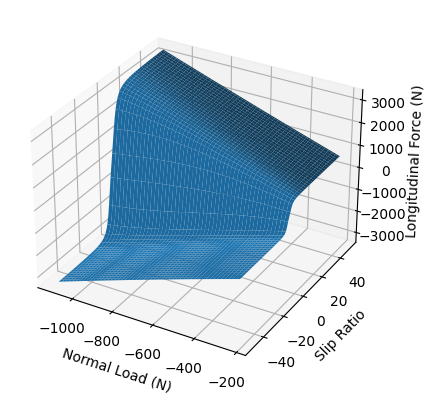

In [7]:
model_x_data = np.linspace(min(x_lst), max(x_lst), 1000)
model_y_data = np.linspace(-50, 50, 100)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

Z = fit([X, Y], *optimal)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(X, Y, Z)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Ratio')
ax.set_zlabel('Longitudinal Force (N)')

plt.show()